---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 1 

---

Please write your full name here
- **Name** : "Tark Salah"
- **Sec** : 1
- **B.N** : 44

## Introduction to Machine Learning
For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer,load_iris

cancer = load_breast_cancer()

#print(cancer.DESCR) # Print the data set description

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [38]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Question 0

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [39]:
def answer_zero():
    # write your answer code here to question 0
    features = len(cancer['feature_names'])
    return features # Return your answer

### Question 1
Pandas dataframes are much easier and more interpretable when dealing with tables. **Convert the cancer data into dataframe.**

Note: Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training any model.

*This function should return a (569, 31) DataFrame with *

*columns = *

    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']
    
*and index = *

RangeIndex(start=0, stop=569, step=1)

In [40]:
print(cancer.data[0:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [41]:
print(cancer.target[0:2])

[0 0]


In [42]:
print(np.c_[cancer.data[0:2], cancer.target[0:2]])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02 0.000e+00]]


In [43]:
def answer_one():
    
    # Your code here
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns) # Return your answer
answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


### Question 2
What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

In [44]:
def answer_two():
    cancerdf = answer_one()
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = "malignant benign".split()
    return counts
answer_two()

malignant    212
benign       357
Name: target, dtype: int64

### Question 3
Split the DataFrame into `X` (the data) and `y` (the labels).

In [45]:
def answer_three():
      
    cancerdf = answer_one()
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    return X, y

### Question 4
Using `train_test_split`, split `X` and `y` into training and test sets

In [46]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    # Your code here
    
    return train_test_split(X, y, train_size=426, test_size=143, random_state=0)

### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train`.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    # Your code here
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    return model # Return your answer

### Question 6
Using your knn classifier, predict the class label using the median value for each feature.

In [48]:
def answer_six():
    cancerdf = answer_one()    
    # Your code here
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    model = answer_five()
    return model.predict(means)

### Question 7
Using your knn classifier, predict the class labels for the test set `X_test`.

In [49]:
def answer_seven():
    # Your code here
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.predict(X_test)

### Question 8
Find the score (accuracy) of your knn classifier using `X_test` and `y_test` & `X_train` and `y_train`. 
- Is the training accuracy higher or lower that the testing accuracy? 
- According to the test accuracy, would this model generalize well to new inputs?

In [50]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    
    return knn.score(X_test, y_test)

### Question 9
##### Accuracy Plot
* Create `mal_train_X`, `mal_train_y`,`ben_train_X`,`ben_train_y`, `mal_test_X`,`mal_test_y`, `ben_test_X` and `ben_test_y` portions of the dataset. Where `mal_train_X` contains all training samples that belongs to malignant class while `mal_train_y` contains all labels of the samples that belongs to malignant class, and so on for other variables.

* Calculate Accuracy scores for each case and save all the results in a list called `scores` using knn model from question 5.

Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

In [51]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

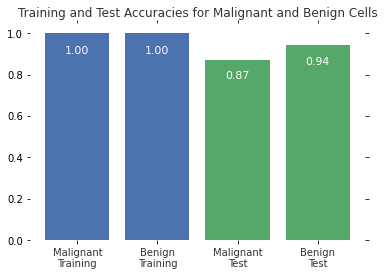

In [52]:
accuracy_plot() 

### Question 10
1. Load Iris dataset from sklearn.
2. Split the data into training and testing (30% testing)
3. Create scatter plot.
4. From the scatter plot choose two features only to train a knn model with suitable "k" of your choice.
5. Evaluate your model performance and comment on your results.

In [53]:
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
def dataFrame():
    data = np.c_[iris.data, iris.target]
    columns = np.append(iris.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns) # Return your answer


In [56]:
def splitting():
      
    irisdf = dataFrame()
    X = irisdf[irisdf.columns[:-1]]
    y = irisdf.target
    return X, y

In [57]:
def training_and_testing():
    X, y = splitting()
    
    # Your code here
    
    return train_test_split(X, y, test_size = 0.30, random_state=0)

In [58]:
from matplotlib import cm
def scatter_plot():
    X_train, X_test, y_train, y_test = training_and_testing()

    cmap = cm.get_cmap('gnuplot')
    scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

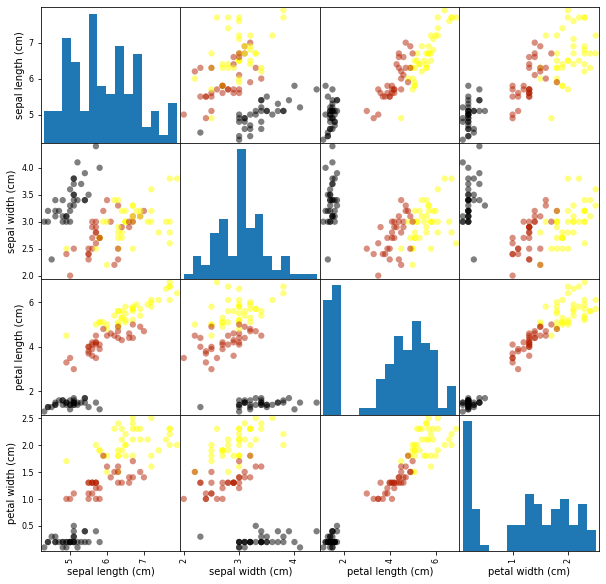

In [59]:
scatter_plot()

In [60]:
def training():
    irisdf = dataFrame()
    X = irisdf[irisdf.columns[0:2]]
    y = irisdf.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    model.score(X_test, y_test)
    print(model.score(X_test, y_test))

In [61]:
training()

0.7111111111111111


at K = 1 the Accuracy (Performance) is 71% that means we can get 71% of the tests right